In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
import numpy as np
import torch
import json
from collections import Counter

base = '/opt/ml/detection/dataset'
trainroot = os.path.join(base, 'train')
testroot = os.path.join(base, 'test')
resultroot = './results'

if not os.path.isdir(resultroot):
    os.makedirs(resultroot)

In [2]:
train_json = json.load(open(os.path.join(base, 'train.json')))

is_vis = False
for k in train_json.keys():
    print(f'{k: <14}:\t {len(train_json[k])}')

print('\n  [images]')
all_paths = train_json['images'][:3]
for path in all_paths:
    print(f'\t{path}')

print('\n  [categories]')
for v in train_json['categories']:
    print(f'\t{v["id"]}:  {v["name"]}')

print('\n  [annotations]')
annots = train_json['annotations'][:3]
for ann in annots:
    print(f'\t{ann}')

annots = train_json['annotations']
cates = []

for v in train_json['categories']:
    cates.append(v['name'])
print(f'\n{cates}')
print(train_json['categories'])

info          :	 6
licenses      :	 1
images        :	 4883
categories    :	 10
annotations   :	 23144

  [images]
	{'width': 1024, 'height': 1024, 'file_name': 'train/0000.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2020-12-26 14:44:23', 'id': 0}
	{'width': 1024, 'height': 1024, 'file_name': 'train/0001.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2021-01-10 16:30:39', 'id': 1}
	{'width': 1024, 'height': 1024, 'file_name': 'train/0002.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2020-12-27 17:55:52', 'id': 2}

  [categories]
	0:  General trash
	1:  Paper
	2:  Paper pack
	3:  Metal
	4:  Glass
	5:  Plastic
	6:  Styrofoam
	7:  Plastic bag
	8:  Battery
	9:  Clothing

  [annotations]
	{'image_id': 0, 'category_id': 0, 'area': 257301.66, 'bbox': [197.6, 193.7, 547.8, 469.7], 'iscrowd': 0, 'id': 0}
	{'image_id': 1, 'category_id': 3, 'area': 10402.56, 'bbox': [0.0, 407.4, 57.6, 180.6], 'iscrowd': 0, 

[('Battery', 159), ('Clothing', 468), ('Paper pack', 897), ('Metal', 936), ('Glass', 982), ('Styrofoam', 1263), ('Plastic', 2943), ('General trash', 3966), ('Plastic bag', 5178), ('Paper', 6352)]


<BarContainer object of 10 artists>

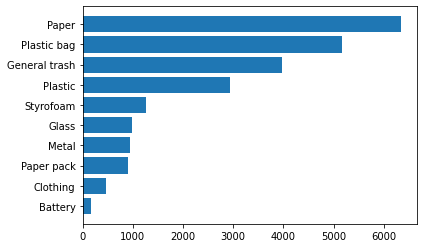

In [3]:
ann_cnt = Counter()
for ann in annots:
    ann_cnt.update([cates[int(ann['category_id'])]])


ann_cnt = sorted(ann_cnt.items(), key = lambda x: x[1], reverse=False)
print(ann_cnt)

xs, ys = [], []
for x, y in ann_cnt:
    xs.append(x)
    ys.append(y)
plt.barh(xs, ys)

In [45]:
font = ImageFont.truetype('./ubuntu.regular.ttf', 15)
color_group = {'General trash': 'orange', 'Paper': 'white', 'Paper pack': 'ivory', 'Metal': 'dimgrey', 'Glass': 'dodgerBlue', 'Plastic': 'darkolivegreen', 'Styrofoam': 'khaki', 'Plastic bag': 'Teal', 'Battery': 'lime', 'Clothing': 'fuchsia'}

def drawbox(draw, cate, pt1, pt2):
    draw.rectangle((pt1, pt2), outline=color_group[cate], width=3)
    backrec = (pt1[0]+90, pt1[1]+15)
    # draw.rectangle((pt1, backrec), outline=(0,0,0), fill=True)
    draw.text(pt1, cate, (255,255,255), font=font, backrec=True)

In [46]:
##
# visualizing annots

train_paths = glob(os.path.join(trainroot, '*'))
test_paths = glob(os.path.join(testroot, '*'))
print(f'{len(train_paths)} {len(test_paths)}')


images = train_json['images']
for image in tqdm(images):
    img = Image.open(os.path.join(base, image['file_name']))
    draw = ImageDraw.Draw(img)
    for ann in annots:
        if ann['image_id'] == image['id']:
            x,y,w,h = ann['bbox']
            pt1, pt2 = (x,y), (x+w, y+h)
            drawbox(draw, cates[ann['category_id']], pt1, pt2)
            img.save(os.path.join(resultroot, image['file_name'].split('/')[-1]))

4883 4871


 26%|██▌       | 1270/4883 [04:37<13:09,  4.58it/s]


KeyboardInterrupt: 